<a href="https://colab.research.google.com/github/CamTu22/DAOTHICAMTU_20104009/blob/main/Nh%E1%BA%ADn_di%E1%BB%87n_hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Khai báo thư viện
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [15]:
%cd /content/drive/MyDrive/Colab Notebooks/BTVN_nhan_dien/flower/

/content/drive/MyDrive/Colab Notebooks/BTVN_nhan_dien/flower


In [6]:
train_data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN_nhan_dien/flower/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 180 images belonging to 3 classes.


In [7]:
test_set = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN_nhan_dien/flower/Test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 40 images belonging to 3 classes.


In [8]:
train_set.class_indices


{'Mai': 0, 'Sen': 1, 'camtu cau': 2}

In [9]:
test_set.class_indices

{'Mai': 0, 'Sen': 1, 'camtu cau': 2}

In [10]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [11]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_set,epochs=100,batch_size=128,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/100
6/6 [==============================] - 51s 8s/step - loss: 6.1605 - accuracy: 0.3889 - val_loss: 1.0913 - val_accuracy: 0.5750
Epoch 2/100
6/6 [==============================] - 3s 439ms/step - loss: 1.0470 - accuracy: 0.4667 - val_loss: 0.8087 - val_accuracy: 0.6250
Epoch 3/100
6/6 [==============================] - 3s 436ms/step - loss: 0.6138 - accuracy: 0.7333 - val_loss: 0.6776 - val_accuracy: 0.6750
Epoch 4/100
6/6 [==============================] - 3s 449ms/step - loss: 0.5817 - accuracy: 0.7111 - val_loss: 0.3476 - val_accuracy: 0.8250
Epoch 5/100
6/6 [==============================] - 3s 430ms/step - loss: 0.4441 - accuracy: 0.7778 - val_loss: 0.3309 - val_accuracy: 0.8750
Epoch 6/100
6/6 [==============================] - 2s 433ms/step - loss: 0.4065 - accuracy: 0.8500 - val_loss: 0.3551 - val_accuracy: 0.8500
Epoch 7/100
6/6 [==============================] - 3s 424ms/step - loss: 0.3550 - accuracy: 0.8556 - val_loss: 0.2669 - val_accuracy: 0.8750
Epoch 8/100
6/6

In [18]:
model.save('Nhan_dien_hoa.h5')

In [19]:
model_hoa = load_model('Nhan_dien_hoa.h5')

In [20]:
Score=model.evaluate(train_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.11035342514514923
Train Accuracy 0.9444444179534912


1/1 [==============================] - 1s 514ms/step
Hoa Cẩm Tú cầu


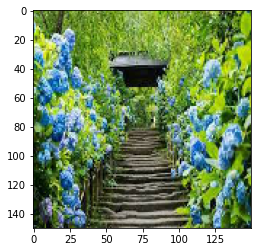

In [21]:
img = load_img('/content/ct2.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_hoa.predict(img)
if round(result[0][0])==1:
  prediction='Hoa Mai'
if round(result[0][1])==1:
  prediction='Hoa Sen'
if round(result[0][2])==1:
  prediction='Hoa Cẩm Tú cầu'
print(prediction)